notes : 
- trouver comment exploiter le "superuser"

## Ajout autres features

Nous n’avons volontairement pas concaténé l’ensemble des avis d’un restaurant afin d’éviter un biais de volume lié au nombre d’avis. Nous prenons 40 avis par restaurant ce qui correspond à la mediane du nombre d'avis par restaurant. Nous prenons les 40 avis les plus recents pour avoir l'information la plus a jour.

In [6]:
import pandas as pd
import json
data = []
with open("data/philly_restaurant_reviews.json", "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))
textes=pd.DataFrame(data)

# nombre d'avis par business
nb_avis = textes.groupby("business_id").size()

nb_avis.describe()
# s'assurer que la colonne date est bien au format datetime
textes["date"] = pd.to_datetime(textes["date"])

textes_restaurant = (
    textes
    .sort_values("date", ascending=False)   # du plus récent au plus ancien
    .groupby("business_id")
    .head(40)                                # garder les 40 plus récents
    .groupby("business_id", as_index=False)["text"]
    .apply(" ".join)
)

textes_restaurant.head()


,business_id,text
0,-0M0b-XhtFagyLmsBtOe8w,Ok so this place is an extremely odd hole in t...
1,-0PN_KFPtbnLQZEeb23XiA,Far and away the best Chinese food to order if...
2,-0TffRSXXIlBYVbb5AwfTg,I went to indieblue a few years ago for happy ...
3,-0eUa8TsXFFy0FCxHYmrjg,"We are sitting in an ICU waiting room, several..."
4,-1B9pP_CrRBJYPICE5WbRA,The food is absolutely amazing. I get food ...


In [ ]:
photos = pd.read_csv('embeddings_by_business.csv')
texte=pd.read_csv("restaurants_embeddings_1.2.csv")
features=
photos.rename(columns={'gbusiness_id':'business_id'}, inplace=True)
df=pd.merge(photos, textes_restaurant, on='business_id', how='outer')
df.rename(columns={'embedding':'image_embedding'}, inplace=True)
df=pd.merge(df, texte, on='business_id', how='outer')
df.rename(columns={'embedding':'texte_embedding'}, inplace=True)



In [7]:
import numpy as np
# Étape 1: Convertir les strings en vecteurs numériques
def convert_embeddings(embeddings_strings):
    """
    Convertit un array de strings d'embeddings en array numérique 2D
    Les embeddings 'nan' sont gardés comme vecteurs de NaN
    """
    embeddings_list = []
    embedding_dim = None
    
    # Premier passage pour déterminer la dimension
    for emb_str in embeddings_strings:
        if isinstance(emb_str, np.ndarray):
            emb_str = emb_str[0]
        
        if emb_str != 'nan' and emb_str != 'None':
            try:
                emb_str_clean = emb_str.strip('[]')
                emb_array = np.fromstring(emb_str_clean, sep=' ')
                embedding_dim = len(emb_array)
                break
            except:
                continue
    
    if embedding_dim is None:
        raise ValueError("Impossible de déterminer la dimension des embeddings")
    
    print(f"✓ Dimension des embeddings: {embedding_dim}")
    
    # Deuxième passage pour convertir tous les embeddings
    for i, emb_str in enumerate(embeddings_strings):
        # Extraire la string (elle est dans un array de shape (1,))
        if isinstance(emb_str, np.ndarray):
            emb_str = emb_str[0]
        
        # Si c'est nan, créer un vecteur de NaN
        if emb_str == 'nan' or emb_str == 'None':
            nan_vector = np.full(embedding_dim, np.nan)
            embeddings_list.append(nan_vector)
            continue
        
        try:
            # Nettoyer la string et convertir en array
            emb_str_clean = emb_str.strip('[]')
            emb_array = np.fromstring(emb_str_clean, sep=' ')
            embeddings_list.append(emb_array)
        except Exception as e:
            print(f"⚠️ Erreur pour l'embedding {i}: {e} - remplacé par NaN")
            nan_vector = np.full(embedding_dim, np.nan)
            embeddings_list.append(nan_vector)
    
    # Convertir en array NumPy 2D
    embeddings_2d = np.array(embeddings_list)
    
    # Compter les NaN
    n_nan = np.isnan(embeddings_2d).any(axis=1).sum()
    print(f"✓ {n_nan} embeddings avec NaN gardés")
    
    return embeddings_2d
image_embedding = convert_embeddings(df['image_embedding'].tolist())

✓ Dimension des embeddings: 512
⚠️ Erreur pour l'embedding 1: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 8: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 10: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 11: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 12: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 14: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 16: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 20: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 21: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 22: 'float' object has no attribute 'strip' - remplacé par NaN
⚠️ Erreur pour l'embedding 23: 'float' object has no attribute 'strip'

In [12]:
textes_embedding=convert_embeddings(df['texte_embedding'].tolist())


✓ Dimension des embeddings: 384
✓ 0 embeddings avec NaN gardés


In [258]:
features=pd.read_csv('restaurant_features.csv')

In [259]:
df=pd.merge(df, features, on='business_id', how='outer')

In [260]:
df

,business_id,image_embedding,n_labels,labels_present,text,n_reviews,avg_stars,std_stars,first_review_x,last_review_x,...,attributes,categories,hours,latitude_y,longitude_y,review_count_y,restaurants_within_500m,avg_neighbor_review_count,relative_review_intensity,distance_to_center_km
0,-0M0b-XhtFagyLmsBtOe8w,[ 9.81536725e-03 -1.35909736e-03 1.12843779e-...,1.0,inside,Ok so this place is an extremely odd hole in t...,18,3.722222,0.894792,2012-02-10 04:00:49,2018-05-13 04:00:27,...,"{'Alcohol': ""u'full_bar'"", 'OutdoorSeating': '...","Bars, Nightlife, Restaurants, French, Wine Bars","{'Thursday': '17:0-0:0', 'Friday': '17:0-0:0',...",39.967439,-75.175452,18,47,173.708333,0.103622,1.993035
1,-0PN_KFPtbnLQZEeb23XiA,NaN,NaN,NaN,Far and away the best Chinese food to order if...,11,3.363636,1.361817,2009-10-16 15:24:48,2016-04-15 21:44:07,...,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Chinese","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",39.923048,-75.178078,9,46,57.893617,0.155458,6.095792
2,-0TffRSXXIlBYVbb5AwfTg,[-2.06359725e-03 2.78890153e-02 9.09338878e-...,4.0,"drink, food, inside, outside",I went to indieblue a few years ago for happy ...,1132,4.355124,0.983165,2013-06-01 01:47:50,2022-01-18 18:56:27,...,"{'RestaurantsReservations': 'True', 'NoiseLeve...","Cocktail Bars, Food Delivery Services, Nightli...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ...",39.948508,-75.161969,1097,450,210.201774,5.218795,2.991351
3,-0eUa8TsXFFy0FCxHYmrjg,[ 3.80490937e-02 -7.54836206e-04 8.75527248e-...,1.0,food,"We are sitting in an ICU waiting room, several...",28,3.964286,1.070899,2015-10-20 18:20:03,2019-09-14 17:35:02,...,"{'BikeParking': 'True', 'RestaurantsGoodForGro...","Caterers, Sandwiches, Delis, Restaurants, Cafe...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",39.952446,-75.187321,26,66,91.746269,0.283390,3.764602
4,-1B9pP_CrRBJYPICE5WbRA,[-2.49907263e-02 3.30465585e-02 3.43133989e-...,2.0,"food, inside",The food is absolutely amazing. I get food ...,851,3.808461,1.205760,2012-07-18 02:37:42,2022-01-16 19:38:30,...,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Asian Fusion, Restaurants, American (New), Tha...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30...",39.950352,-75.161583,822,488,219.656442,3.742208,2.784421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,zxY4DgtXsVHihSUpsmwamg,NaN,NaN,NaN,This Place has Good Hoagies and the Staff is s...,6,4.333333,0.516398,2012-05-06 22:52:29,2019-10-02 02:55:18,...,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Food, Do-It-Yourself Food, Restaurants, Italian",NaN,39.928473,-75.161983,6,96,126.979381,0.047252,5.183790
5848,zy7uNOvpykrq-XlmDY_wHA,NaN,NaN,NaN,"Sadiki's is now Relish, nothing last's over th...",6,3.166667,0.983192,2008-01-19 20:59:57,2009-06-08 22:26:57,...,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Food, Southern, Restaurants",NaN,40.063543,-75.153158,6,12,57.230769,0.104839,9.857332
5849,zyMkbavgHASQtqVwaock9A,NaN,NaN,NaN,I've had pretty much everything on the menu an...,21,3.809524,0.928388,2010-05-08 16:38:03,2015-02-09 16:10:42,...,"{'OutdoorSeating': 'True', 'Ambience': ""{'roma...","Caterers, Internet Cafes, Event Planning & Ser...","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ...",39.962976,-75.169315,21,67,155.176471,0.135330,1.841658
5850,zz-fcqurtm77bZ_rVvo2Lw,[ 3.73759915e-02 5.26558618e-02 -2.25258733e-...,1.0,food,"My love affair with Yumtown began with ""The Jo...",25,4.480000,0.714143,2011-11-17 17:08:56,2013-09-30 04:29:21,...,"{'RestaurantsPriceRange2': '1', 'Alcohol': ""u'...","Food Stands, Restaurants","{'Monday': '11:0-16:0', 'Tuesday': '11:0-16:0'...",39.982937,-75.154732,24,52,25.415094,0.944321,0.908187


1) ajouter autres features (5/6 max)
2)Réduction de dimension (UMAP)
3)Clustering (HDBSCAN)

4)Extraction des mots-clés (c-TF-IDF)

## Traitement NLP

Conformément à la méthodologie proposée par BERTopic, les documents sont représentés à l’aide d’embeddings Sentence-BERT (SBERT), une approche spécifiquement conçue pour comparer des phrases et des documents entiers sur la base de leur similarité sémantique. d'apres les auteurs it achieves state-of-the-art performance on various sentence embedding tasks (Reimers and urevych, 2020; Thakur et al., 2020). En particulier, le modèle all-MiniLM-L6-v2 est recommandé dans des contextes à ressources limitées sans GPU

notes : donner + d'argument prk sbert bon pour notre cas

Sbert doit recevoir un texte le plus priche du langage naturel donc les preprocessing lourds comme les stopword removal ou la lemmatization sont appliqués suelement dans la partie topic representations (c-TF-IDF) suivant les recos (Grootendorst (2022) and Reimers & Gurevych (2019).)

par contre on sait que naturlmment nous allons avoir des clusters autour du type de nourriturz comment on l'a vu dans le papier... et on a fait le test et on avait bcp de mots liés à la cuisine. donc on- va les enelever. 

On peut passer maintenant àl'embedding 

In [ ]:
pandas as pd
import json
import html
import re
import numpy as np
from sentence_transformers import SentenceTransformer

data = []
with open("philly_restaurant_reviews.json", "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))
textes=pd.DataFrame(data)

# nombre d'avis par business
nb_avis = textes.groupby("business_id").size()
nb_avis.describe()

#nettoyer les données avant de les embedder
def clean_data(text):
    if not isinstance(text, str):
        return ""
    text = html.unescape(text)
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

# s'assurer que la colonne date est bien au format datetime
textes["date"] = pd.to_datetime(textes["date"])
textes["text_clean"] = textes["text"].apply(clean_data)

textes_40 = (
    textes
    .sort_values("date", ascending=False)   # du plus récent au plus ancien
    .groupby("business_id")
    .head(40)                                # garder les 40 plus récents
)

model = SentenceTransformer('all-MiniLM-L6-v2')

# Embedder chaque avis individuellement, puis moyenner par restaurant
print("Embedding des avis")
business_embeddings = []

for business_id in textes_40['business_id'].unique():
    business_reviews = textes_40[textes_40['business_id'] == business_id]['text_clean'].tolist()
    review_embeddings = model.encode(
        business_reviews,
        batch_size=32,
        show_progress_bar=True,
        normalize_embeddings=True
    )
    mean_embedding = review_embeddings.mean(axis=0)
    mean_embedding = mean_embedding / np.linalg.norm(mean_embedding)

    business_embeddings.append({
        'business_id': business_id,
        'embedding': mean_embedding,
        'n_reviews': len(business_reviews)
    })

textes_restaurant = pd.DataFrame(business_embeddings)

print(f"\n✓ Terminé ! {len(textes_restaurant)} restaurants avec embeddings")
print(f"Dimension des embeddings: {textes_restaurant['embedding'].iloc[0].shape}")

textes_restaurant.head()

Batches:   0%|          | 0/183 [00:00<?, ?it/s]

In [265]:
embeddings_txt.shape

(5852, 384)

## Reduction de dimensionalité

In [266]:
df.columns

Index(['business_id', 'image_embedding', 'n_labels', 'labels_present', 'text',
       'n_reviews', 'avg_stars', 'std_stars', 'first_review_x',
       'last_review_x', 'activity_span_days_x', 'velocity_reviews', 'n_star_1',
       'n_star_2', 'n_star_3', 'n_star_4', 'n_star_5', 'share_5_star',
       'share_1_star', 'monthly_review_volatility', 'first_review_y',
       'last_review_y', 'activity_span_days_y', 'reviews_per_month', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude_x', 'longitude_x',
       'stars', 'review_count_x', 'is_open', 'attributes', 'categories',
       'hours', 'latitude_y', 'longitude_y', 'review_count_y',
       'restaurants_within_500m', 'avg_neighbor_review_count',
       'relative_review_intensity', 'distance_to_center_km',
       'cleaned_text_embedding'],
      dtype='object')

On utilise la methode UMAP pour la reduction de dimensionnalité “Although PCA and t-SNE are well-known methods for reducing dimensionality, UMAP has shown to preserve more of the local and global features of high-dimensional data in lower projected dimensions.” BERTopic

on ne peut pas optimiser les hyperparametres dans du non supervisé donc pour choisir le hyperparametres on se base sur bertopic, ils ont testé sur plusieurs textes et ont choisir ces params. on verifiera plus tard la robustesse.


Au lieu de coller les colonnes les unes aux autres, UMAP fusionne les relations de voisinage. Pour chaque restaurant, il regarde s'il est proche d'un autre dans l'univers du texte, OU de l'image, OU des stats, OU de la géo.
Si on a 300 colonnes de texte + 512 d'images + 10 de stats, on se retrouve avec un espace à 1034 dimensions. Dans un espace aussi vaste, tous les points finissent par paraître "loin" les uns des autres de manière presque égale. En séparant les mappers, UMAP traite d'abord la structure de chaque "monde" à taille humaine avant de les réconcilier.
L'avantage majeur : Si un restaurant n'a pas de photo (vecteur nul), l'univers "Image" n'aura rien à dire sur lui. Le modèle se rabattra automatiquement sur les trois autres univers pour décider de sa position. Egalement permet d'utiliser une métrique de distance adaptée à chaque domaine

Pour les images et les textes on prends des n_neigbours assez elevé pour forcer a regarder la structure globale ("Luxe" vs "Fast-food) plutot que focus sur la nourriture 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
import umap
import hdbscan

# 1. Réduire les embeddings texte
pca = PCA(n_components=50)  # Garde ~90% de variance
text_reduced = pca.fit_transform(text_emb)
print(f"Variance conservée: {pca.explained_variance_ratio_.sum():.1%}")

# 2. Normaliser
text_scaled = StandardScaler().fit_transform(text_reduced)
stats_scaled = RobustScaler().fit_transform(stats)  # Robuste aux outliers

# 3. Combiner avec poids ajustable
alpha = 0.65  # À optimiser par grid search
combined = np.concatenate([
    alpha * text_scaled,
    (1 - alpha) * stats_scaled
], axis=1)

# 4. UMAP pour capturer les structures non-linéaires
reducer = umap.UMAP(
    n_components=30,
    n_neighbors=15,
    min_dist=0.0,
    metric='euclidean',
    random_state=42
)
embedded = reducer.fit_transform(combined)

# 5. HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=15,
    min_samples=5,
    cluster_selection_epsilon=0.0
)
labels = clusterer.fit_predict(embedded)

# 6. Analyser
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = (labels == -1).sum()
print(f"Clusters: {n_clusters}, Bruit: {n_noise}/{len(labels)}")

In [306]:
X_final.shape

(5852, 10)

In [16]:
import umap
mapper_txt = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=5, metric="cosine", random_state=42).fit(textes_embedding)
embeddings_umap = mapper_txt.fit_transform(textes_embedding)

/Users/taniaadmane/miniconda3/envs/ml/lib/python3.10/site-packages/umap/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Clustering

On utilise HDBscan pour effectuer la clusterisation, car deja ca focntionne bien apres umap et c'est plsu ronuste. aussi bertopic l'ont choisit lol (à justifier un peu plus)
justifier le choix d'hyperparam


In [42]:
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=60, #taille minimale d'un cluster
    min_samples=60, #en pratique on met min_samples = min_cluster_size pour des resultats plus stables
    metric="euclidean", # parce que UMAP nous a donné des vecteurs en euclidean
    cluster_selection_method="eom", #on garde les clusters qui ont le plus de “masse” stable dans l’arbre, leaf npous donnerait des clusters trop petit
    prediction_data=True #pour pouvoir assigner de nouveaux points plus tard
)

cluster_labels = hdbscan_model.fit_predict(embeddings_umap)


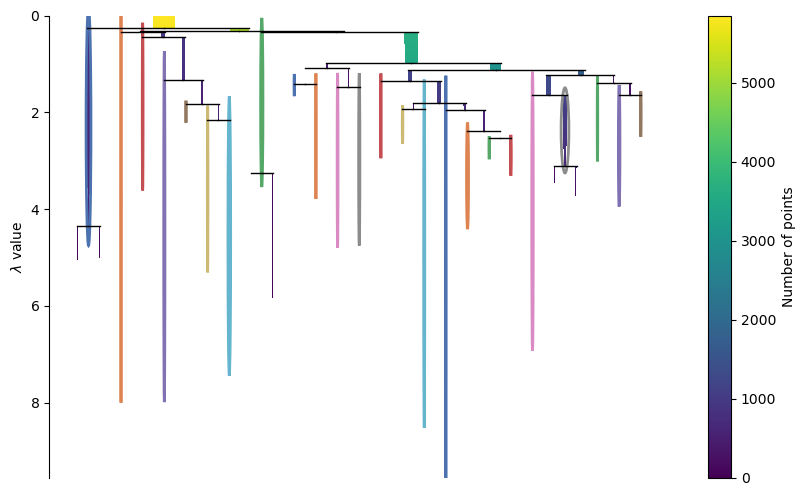

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
hdbscan_model.condensed_tree_.plot(select_clusters=True, 
                                   selection_palette=sns.color_palette('deep', 30))
plt.show()


In [44]:
# On récupère les labels uniques
unique_labels = set(cluster_labels)

# On compte le nombre de labels, en excluant -1 s'il est présent
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Nombre de clusters identifiés : {n_clusters}")
print(f"Nombre de points considérés comme du bruit : {n_noise} (sur {len(cluster_labels)} restaurants)")

Nombre de clusters identifiés : 24
Nombre de points considérés comme du bruit : 1023 (sur 5852 restaurants)


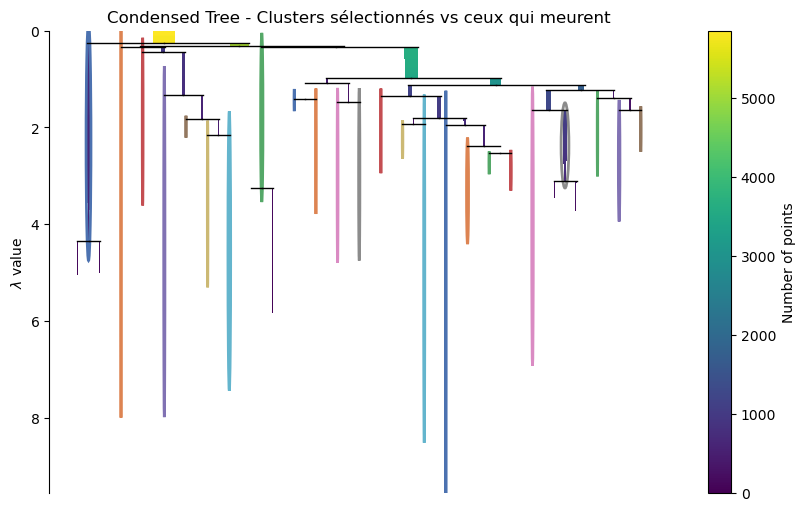

📊 Analyse HDBSCAN:
  - Clusters finaux (survivants): 24
  - Clusters qui meurent: 29
  - Points de bruit (-1): 1023
  - Total clusters dans l'arbre: 53

📈 Taille des clusters finaux:
  Cluster 0: 663 points
  Cluster 1: 113 points
  Cluster 2: 314 points
  Cluster 3: 110 points
  Cluster 4: 165 points
  Cluster 5: 78 points
  Cluster 6: 121 points
  Cluster 7: 167 points
  Cluster 8: 81 points
  Cluster 9: 367 points
  Cluster 10: 61 points
  Cluster 11: 102 points
  Cluster 12: 67 points
  Cluster 13: 69 points
  Cluster 14: 212 points
  Cluster 15: 92 points
  Cluster 16: 209 points
  Cluster 17: 1052 points
  Cluster 18: 83 points
  Cluster 19: 152 points
  Cluster 20: 87 points
  Cluster 21: 273 points
  Cluster 22: 70 points
  Cluster 23: 121 points


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualisation
plt.figure(figsize=(10, 6))
hdbscan_model.condensed_tree_.plot(select_clusters=True, 
                                   selection_palette=sns.color_palette('deep', 30))
plt.title("Condensed Tree - Clusters sélectionnés vs ceux qui meurent")
plt.show()

# Statistiques détaillées
n_clusters_final = len(set(hdbscan_model.labels_)) - (1 if -1 in hdbscan_model.labels_ else 0)
n_noise = np.sum(hdbscan_model.labels_ == -1)

# Clusters dans l'arbre
tree_df = hdbscan_model.condensed_tree_.to_pandas()
n_clusters_total = len(tree_df['parent'].unique())
n_clusters_morts = n_clusters_total - n_clusters_final

print(f"📊 Analyse HDBSCAN:")
print(f"  - Clusters finaux (survivants): {n_clusters_final}")
print(f"  - Clusters qui meurent: {n_clusters_morts}")
print(f"  - Points de bruit (-1): {n_noise}")
print(f"  - Total clusters dans l'arbre: {n_clusters_total}")

# Distribution des tailles
unique, counts = np.unique(hdbscan_model.labels_[hdbscan_model.labels_ != -1], return_counts=True)
print(f"\n📈 Taille des clusters finaux:")
for cluster_id, size in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {size} points")

In [294]:
# Moyenne des probabilités d'appartenance par cluster
df['cluster'] = cluster_labels
df['prob'] = hdbscan_model.probabilities_
print(df.groupby('cluster')['prob'].mean())

cluster
-1     0.000000
 0     0.744859
 1     0.784214
 2     0.935673
 3     0.992914
 4     0.900269
 5     0.982924
 6     0.997926
 7     0.844632
 8     0.907596
 9     0.820518
 10    0.982514
 11    0.938777
 12    0.849321
 13    0.951735
 14    0.762845
Name: prob, dtype: float64


## interpretation des clusters

on commence par attacher les clusters aux textes

In [30]:
textes_restaurant['cluster'] = cluster_labels

In [31]:
textes_restaurant

,business_id,text,cluster
0,-0M0b-XhtFagyLmsBtOe8w,Ok so this place is an extremely odd hole in t...,20
1,-0PN_KFPtbnLQZEeb23XiA,Far and away the best Chinese food to order if...,16
2,-0TffRSXXIlBYVbb5AwfTg,I went to indieblue a few years ago for happy ...,2
3,-0eUa8TsXFFy0FCxHYmrjg,"We are sitting in an ICU waiting room, several...",25
4,-1B9pP_CrRBJYPICE5WbRA,The food is absolutely amazing. I get food ...,-1
...,...,...,...
5847,zxY4DgtXsVHihSUpsmwamg,This Place has Good Hoagies and the Staff is s...,19
5848,zy7uNOvpykrq-XlmDY_wHA,"Sadiki's is now Relish, nothing last's over th...",20
5849,zyMkbavgHASQtqVwaock9A,I've had pretty much everything on the menu an...,25
5850,zz-fcqurtm77bZ_rVvo2Lw,"My love affair with Yumtown began with ""The Jo...",-1


In [32]:
(textes_restaurant["cluster"] == -1).sum()


829

ca fait 30% d'outliers, c'est beaucoup j'ai l'impression ? peut etre reduire le nbre de documents minimum par cluster

Le but de cette prochaine etape est de labeliser les clusters. pour cela on va dabord faire un nettoyage des textes plus important que pour le Sbert. En effet sbert comprends le sens total de la phrase, la pou c-TFIDF travailles avec des mots discrimiannt.
Etant donné que nous on ne veut pas avoir des clusters qui se concentrent sur le type de nourriture mais sur l'experience on va enlever les mots relatifs aux plats, pour eviter d'avoir des cluysters de type "chinease food" "indian food" ect 

In [33]:
import re
import html
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stoplist = set(stopwords.words("english"))
porter = PorterStemmer()


def clean_for_ctfidf(text: str) -> str:
    if not isinstance(text, str):
        return ""

    text = html.unescape(text)
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text)

    tokens = [
        porter.stem(tok)
        for tok in text.split()
        if tok not in stoplist and len(tok) > 2
    ]

    return " ".join(tokens)
textes_restaurant["cleaned_text_ctfidf"] = textes_restaurant["text"].apply(clean_for_ctfidf)

on fait un document avec tous les textes par cluster

In [34]:
df = textes_restaurant.copy()

docs_per_cluster = (
    df[df["cluster"] != -1]
    .groupby("cluster")["cleaned_text_ctfidf"]
    .apply(" ".join)
)


on calcul le c-tf-idf

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# vectorisation
vectorizer = CountVectorizer(
    ngram_range=(1, 3),
    min_df=5,
    stop_words="english"
)

X = vectorizer.fit_transform(docs_per_cluster.values)

# c-TF-IDF
tf = X.toarray()
tf_sum = tf.sum(axis=0)

A = tf.sum(axis=1).mean()

ctfidf = tf * np.log(1 + A / tf_sum)


on extrait les tops mots pas cluster

In [36]:
terms = vectorizer.get_feature_names_out()

top_words = {}

for i, cluster_id in enumerate(docs_per_cluster.index):
    scores = ctfidf[i]
    top_idx = scores.argsort()[::-1][:10]
    top_words[cluster_id] = [(terms[j], scores[j]) for j in top_idx]


In [37]:
for cluster_id, words in top_words.items():
    print(f"\n🟦 Cluster {cluster_id}")
    for word, score in words:
        print(f"  {word:<25} {score:.3f}")



🟦 Cluster 0
  wawa                      6604.312
  store                     1395.577
  locat                     1254.868
  sandwich                  1191.052
  ga                        1124.871
  coffe                     1051.573
  alway                     937.963
  hoagi                     849.460
  time                      809.490
  conveni                   795.571

🟦 Cluster 1
  pizza                     65687.433
  order                     28056.888
  place                     15966.502
  deliveri                  15826.109
  chees                     14985.523
  slice                     14604.839
  good                      14392.140
  time                      13385.055
  food                      12850.417
  crust                     12730.915

🟦 Cluster 2
  indian                    11757.874
  naan                      6522.765
  food                      6378.191
  indian food               5584.445
  masala                    5241.250
  chicken                   5